#Wildfire Prediction Using Machine Learning Techniques
###Kellie Bernhardt NWMSU Capstone Project MARCH 2024

In [118]:
#importing the CSV file, original file can be found on GitHub page or at https://www.kaggle.com/datasets/sumitm004/forest-fire-area
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("forestfires.csv")
df.info()

OSError: [Errno 22] Invalid argument: 'forestfires.csv'

The CSV contains 517 non-null values across all 13 attributes which is a good start. Next we will look at the first several entries, some basic statistics, and a correlation matrix for the dataset

In [ ]:
#first 10 rows of the forestfires.csv
print(df.head(n=10))
#statistics of each attribute
print(df.describe())
#correlation matrix
df.corr()

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


The correlation matrix is hard to read with so many attributes

In [ ]:
#adding colors to make the correlation matrix easier to read
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


###Cleaning the dataset

In [ ]:
from calendar import month_abbr
#addidng a new column where month is displayed as the Int8 monthNum
lower_ma = [m.lower() for m in month_abbr]

df['monthNum'] = df['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthNum
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,8
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,8
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,8
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,9
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,9


In [ ]:
#dropping the string values from the dataset as well as X and Y. X and Y were very specific to the Montesinho Natural Park and
#we want the model to be usable in any location
df = df.drop(columns=['X', 'Y','month','day'])
df.head(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthNum
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,8
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,8
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,8
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,9
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,9


In [ ]:
#showing the correlation matrix again with the monthNum attribute
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthNum
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.291477
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.466645
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.868698
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.186597
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.368842
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.095280
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.086368
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.013438
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,0.056496
monthNum,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,1.000000


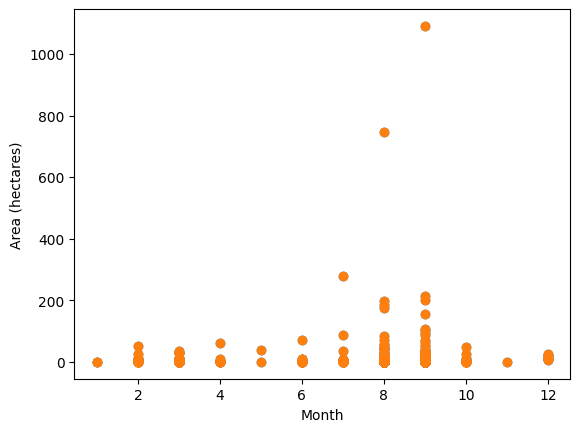

In [ ]:
monthNum = df['monthNum']
area = df['area']

plt.scatter(monthNum, area)
plt.scatter(monthNum, area)
plt.xlabel('Month')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\month_vs_area.eps', format='eps')
plt.show()


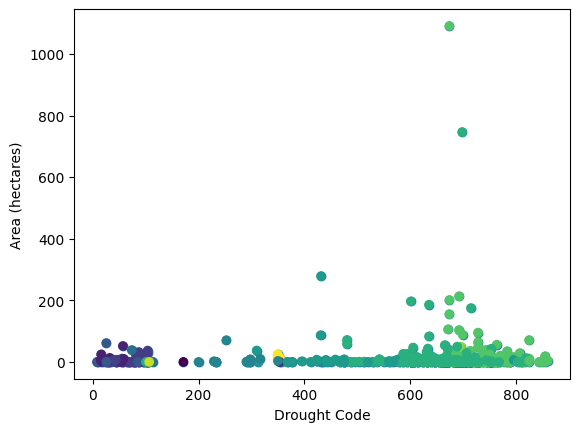

In [ ]:
DC = df['DC']
area = df['area']

plt.scatter(DC, area)
month = df['monthNum']
plt.scatter(DC, area, c=month)
plt.xlabel('Drought Code')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\dc_vs_area.eps', format='eps')
plt.show()


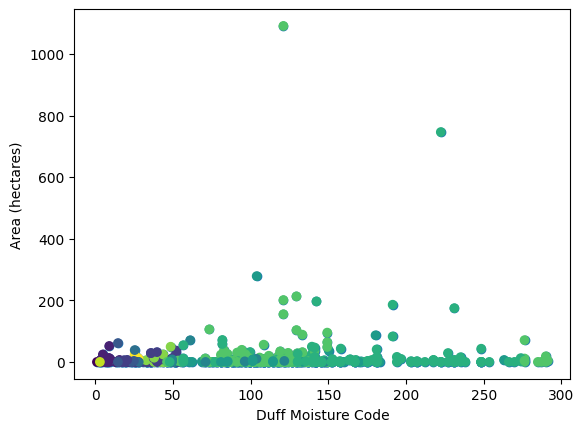

In [ ]:
DMC = df['DMC']
area = df['area']

plt.scatter(DMC, area)
month = df['monthNum']
plt.scatter(DMC, area, c=month)
plt.xlabel('Duff Moisture Code')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\dmc_vs_area.eps', format='eps')
plt.show()


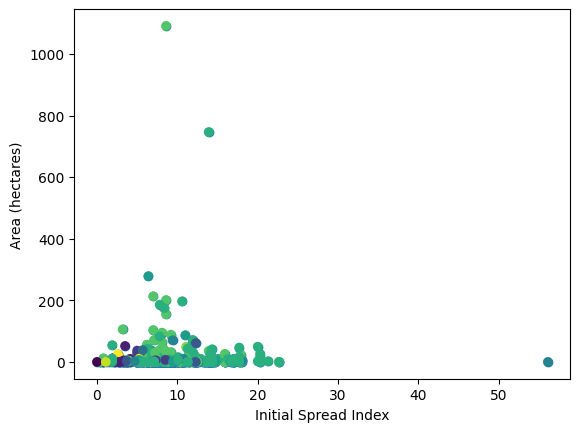

In [ ]:
ISI = df['ISI']
area = df['area']

plt.scatter(ISI, area)
month = df['monthNum']
plt.scatter(ISI, area, c=month)
plt.xlabel('Initial Spread Index')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\isi_vs_area.eps', format='eps')
plt.show()


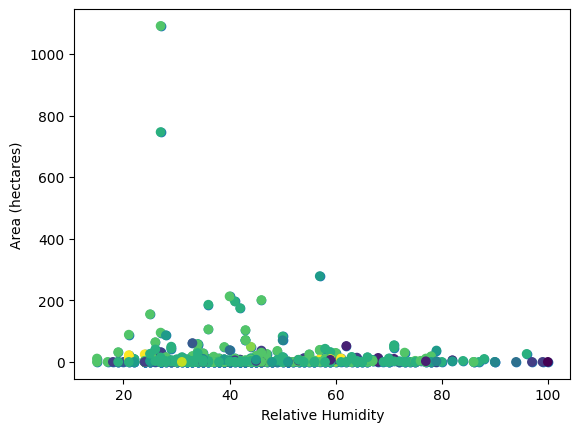

In [ ]:
RH = df['RH']
area = df['area']

plt.scatter(RH, area)
month = df['monthNum']
plt.scatter(RH, area, c=month)
plt.xlabel('Relative Humidity')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\Rh_vs_area.eps', format='eps')
plt.show()


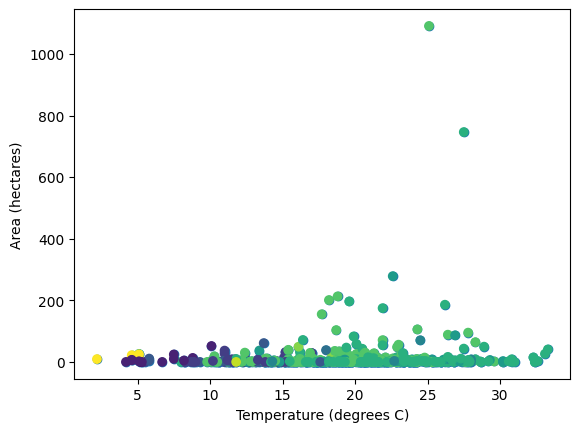

In [ ]:
temp = df['temp']
area = df['area']

plt.scatter(temp, area)
month = df['monthNum']
plt.scatter(temp, area, c=month)
plt.xlabel('Temperature (degrees C)')
plt.ylabel('Area (hectares)')
plt.savefig('G:\My Drive\Grad School\Capstone\Temp_vs_area.eps', format='eps')
plt.show()


Models

In [ ]:
#area is currently a float value however converting to integers makes many models easier to work with
#as shown below, area has a wide range of values and the floats do not add much value to the model 
df.agg({"area": ["min", "max", "median", "skew"]})

,area
min,0.000000
max,1090.840000
median,0.520000
skew,12.846934


In [121]:
#converting area to area_int as this is both simple and will work for the model

df['area_int'] = df['area'].astype({"area": int})
df = df.drop(columns=['area'])
df.head(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,monthNum,area_int
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,3,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,10,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,10,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,3,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,3,0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,8,0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,8,0
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,8,0
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,9,0
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,9,0


In [ ]:
#split the dataset into train and test sets
from sklearn.model_selection import train_test_split

X, y = df, df.area_int
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

Train size:  361 Test size:  156


Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y = train_set['area_int']

X_test = test_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y_test = test_set['area_int']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

#Random Forest Model

In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold='median')
sel.fit(X_train,y_train)


selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['DC', 'temp', 'RH', 'wind', 'area_int'], dtype='object')


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score


rf_model = RandomForestClassifier(n_estimators=150)

rf_model.fit(X,y)

y_pred = rf_model.predict(X)


print('Results for Random Forest on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for Random Forest on train data
  Default settings
Confusion Matrix
[[194   0   0 ...   0   0   0]
 [  0  22   0 ...   0   0   0]
 [  1   0  15 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]
Accuracy is   0.961218836565097
Precision is  0.9584454578846103
Recall is     0.961218836565097
F1 is         0.9576408053883809

Results for Random Forest on test data
  Default settings
Confusion Matrix
[[64  2  3 ...  1  0  0]
 [ 9  1  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]]
Accuracy is   0.4166666666666667
Precision is  0.27103418803418805
Recall is     0.4166666666666667
F1 is         0.32604323780794375


c:\Users\krh52\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krh52\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krh52\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SVC Model

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y = train_set['area_int']

X_test = test_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y_test = test_set['area_int']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



#Neural Network Model

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y = train_set['area_int']

X_test = test_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y_test = test_set['area_int']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

#Ada Boost Model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y = train_set['area_int']

X_test = test_set[['FFMC','DMC','DC','ISI','temp','RH','monthNum']]
y_test = test_set['area_int']

ada_model = AdaBoostClassifier(n_estimators=150)

ada_model.fit(X,y)

y_pred = ada_model.predict(X)


print('Results for ADA on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = ada_model.predict(X_test)
print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))
